## Meshgrid : Gradient Descent

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Example 1: Simple Cost Function
$z = x^2 + y^2$

In [186]:
ns = 10
xs = np.arange(-3,3,1/ns)
ys = np.arange(-3,3,1/ns)

XG, YG = np.meshgrid(xs, ys, sparse=True)  
ZG = XG**2 + YG**2

Update position in Gradient Descent

$x \leftarrow x - \alpha \frac{\partial f(x,y)}{\partial x}$

$y \leftarrow y - \alpha \frac{\partial f(x,y)}{\partial y}$

In [187]:
alpha = 0.01
x,y = 2,2
tol = 1e-5
X,Y = [],[]
for i in range(1000):
    x = x - alpha*2*x
    y = y - alpha*2*y
    X.append(x)
    Y.append(y)
    if x*x+y*y < tol:
        print("at step", i," minimum found!",x,y,x*x+y*y)
        break

at step 336  minimum found! 0.0022091108263220106 0.0022091108263220106 9.760341285946233e-06


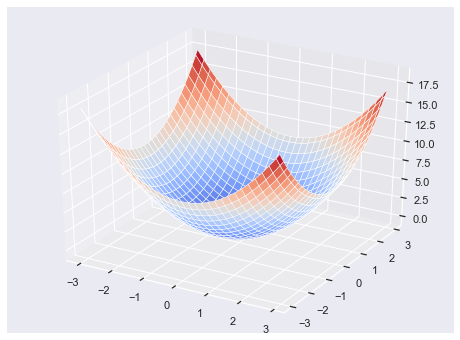

In [188]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize = [8,6])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(XG, YG, ZG,\
                       cmap=cm.coolwarm,\
                       linewidth=0.5)
Z = [x**x+y*y for x,y in zip(X,Y)]
ax.scatter3D(X,Y,Z)
plt.show()

<a list of 12 text.Text objects>

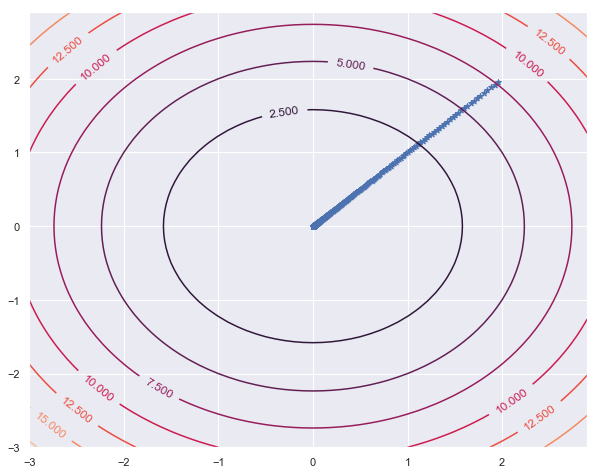

In [189]:
plt.figure(figsize = [10,8])
CS = plt.contour(xs,ys,ZG)
plt.scatter(X,Y,marker="*")
plt.clabel(CS)

#### Example 2:  More Complex Cost Function

$\large{Z = -\frac{sin(x^2+y^2).cos(x^2-y^2)}{x^2+y^2}}$

In [156]:
ns = 10
xs = np.arange(-3,3,1/ns)
ys = np.arange(-3,3,1/ns)

XG, YG = np.meshgrid(xs, ys, sparse=True)  

In [157]:
ZG = -np.sin(XG**2 + YG**2)*np.cos(XG**2 - YG**2) / (XG**2 + YG**2)

- Update position in Gradient Descent

$x \leftarrow x - \alpha \frac{\partial f(x,y)}{\partial x}$

$y \leftarrow y - \alpha \frac{\partial f(x,y)}{\partial y}$

#### Optimization with Gradient Descend

In [158]:
import sympy as sp
from sympy import diff, sin, cos,exp 
from sympy.abc import x,y 

In [159]:
sp.diff(-sin(x*x+y*y)*cos(x*x-y*y)/(x*x+y*y),x)

2*x*sin(x**2 - y**2)*sin(x**2 + y**2)/(x**2 + y**2) - 2*x*cos(x**2 - y**2)*cos(x**2 + y**2)/(x**2 + y**2) + 2*x*sin(x**2 + y**2)*cos(x**2 - y**2)/(x**2 + y**2)**2

In [160]:
sp.diff(-sin(x*x+y*y)*sin(x*x-y*y)/(x*x+y*y),x)

-2*x*sin(x**2 - y**2)*cos(x**2 + y**2)/(x**2 + y**2) - 2*x*sin(x**2 + y**2)*cos(x**2 - y**2)/(x**2 + y**2) + 2*x*sin(x**2 - y**2)*sin(x**2 + y**2)/(x**2 + y**2)**2

In [161]:
from numpy import sin,cos

In [162]:
def fun(x,y):
    f = -sin(x*x+y*y)*cos(x*x-y*y)/(x*x+y*y)
    return f

def find_diff(x,y):
    
    delx = 2*x*sin(x**2 - y**2)*sin(x**2 + y**2)/(x**2 + y**2) \
        + 2*x*cos(x**2 - y**2)*cos(x**2 + y**2)/(x**2 + y**2) \
        - 2*x*sin(x**2 + y**2)*cos(x**2 - y**2)/(x**2 + y**2)**2
    
    dely = -2*y*sin(x**2 - y**2)*sin(x**2 + y**2)/(x**2 + y**2) \
      + 2*y*cos(x**2 - y**2)*cos(x**2 + y**2)/(x**2 + y**2)\
        - 2*y*sin(x**2 + y**2)*cos(x**2 - y**2)/(x**2 + y**2)**2
    
    return delx,dely

In [171]:
alpha = 0.01
x,y = 1,1
tol = 1e-5

'''There are many local minima, 
Gradient discend does not find global minimum'''
X,Y = [],[]
for i in range(10000):
    fdx,fdy = find_diff(x,y)
    x = x - alpha*fdx*x
    y = y - alpha*fdy*y
    X.append(x)
    Y.append(y)

In [175]:
x,y,fun(x,y)

(1.4989011738452027, 1.4989011738452027, 0.21723362821122166)

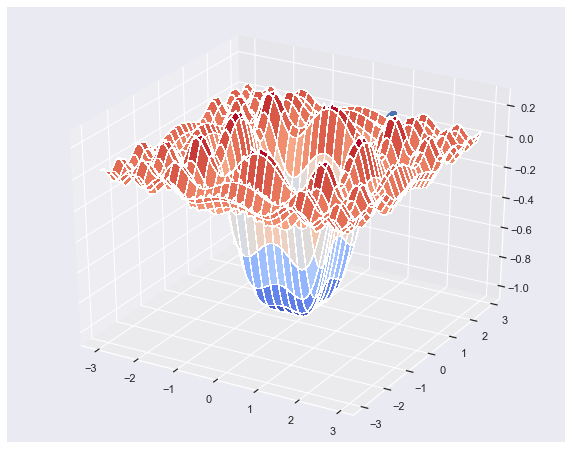

In [176]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize = [10,8])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(XG, YG, ZG,\
                       cmap=cm.coolwarm,\
                       linewidth=0.5,\
                       antialiased=False)

Z = [fun(x,y) for x,y in zip(X,Y)]
ax.scatter3D(X,Y,Z)
plt.show()

<a list of 36 text.Text objects>

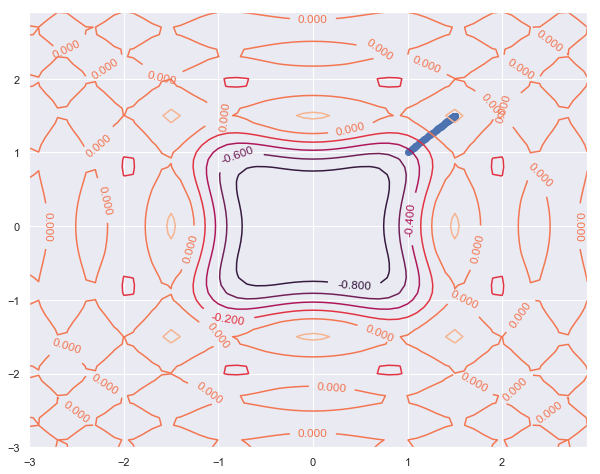

In [174]:
plt.figure(figsize = [10,8])
CS = plt.contour(xs,ys,ZG)
plt.scatter(X,Y)
plt.clabel(CS)

------------